Diabetes Prediction Challenge.


Life cycle of Machine Learning Project
-understand the Problem
-Data collection
-Data checks to perfrom
-Exploratory data analysis
-Data Prepocessing
-Model Training
-choose the best model

1) Problem statement.The goal of this project is to predict probability that a patient will be diagnosed with diabetes

2) ## Data collection
    -Data source:https://www.kaggle.com/competitions/playground-series-s5e12/data?select=train.csv
    About Dataset
    Diabetes Health Indicators Dataset
    Overview
    This dataset contains 100,000 patient records designed for diabetes risk prediction, analysis, and machine learning applications. The dataset is clean, preprocessed, and ready for use in classification, regression, feature engineering, statistical analysis, and data visualization.

    Rows: 100,000
    Columns: 26
    File: diabetes_dataset.csv
    Dataset Description
    The dataset includes patient profiles with features based on demographics, lifestyle habits, family history, and clinical measurements that are well-established indicators of diabetes risk. All data is generated using statistical distributions inspired by real-world medical research, ensuring privacy preservation while reflecting realistic health patterns.

2.1) import Data and required packages
importing Pandas, Numpy,Matplotlib,Seaborn and warnings Library



In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load the training dataset
df_train = pd.read_csv('train.csv')
df_train.head()


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [3]:
# Display basic information about the training dataset
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [4]:
# Display basic statistics of the training dataset
df_train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


The population is mainly middle-aged, and the average person is overweight, with signs of abdominal obesity, which increases the risk of diabetes and heart disease. Most individuals do not meet recommended physical activity levels and spend a high amount of time on screens, indicating a largely sedentary lifestyle.

Diet quality is moderate, and sleep duration is generally adequate, although some individuals experience sleep deprivation. Alcohol consumption is mostly low to moderate, suggesting it is not a major risk factor at the population level.

Average blood pressure, heart rate, and cholesterol levels appear normal, but the presence of very high maximum values shows that high-risk subgroups exist. A large proportion of individuals have diagnosed diabetes, indicating that this is a high-risk population rather than a general healthy one.

In [5]:
# Display the number of unique values in each column
df_train.nunique()

id                                    700000
age                                       71
alcohol_consumption_per_week               9
physical_activity_minutes_per_week       565
diet_score                                99
sleep_hours_per_day                       69
screen_time_hours_per_day                151
bmi                                      231
waist_to_hip_ratio                        36
systolic_bp                               71
diastolic_bp                              54
heart_rate                                60
cholesterol_total                        154
hdl_cholesterol                           69
ldl_cholesterol                          151
triglycerides                            228
gender                                     3
ethnicity                                  5
education_level                            4
income_level                               5
smoking_status                             3
employment_status                          4
family_his

visualization

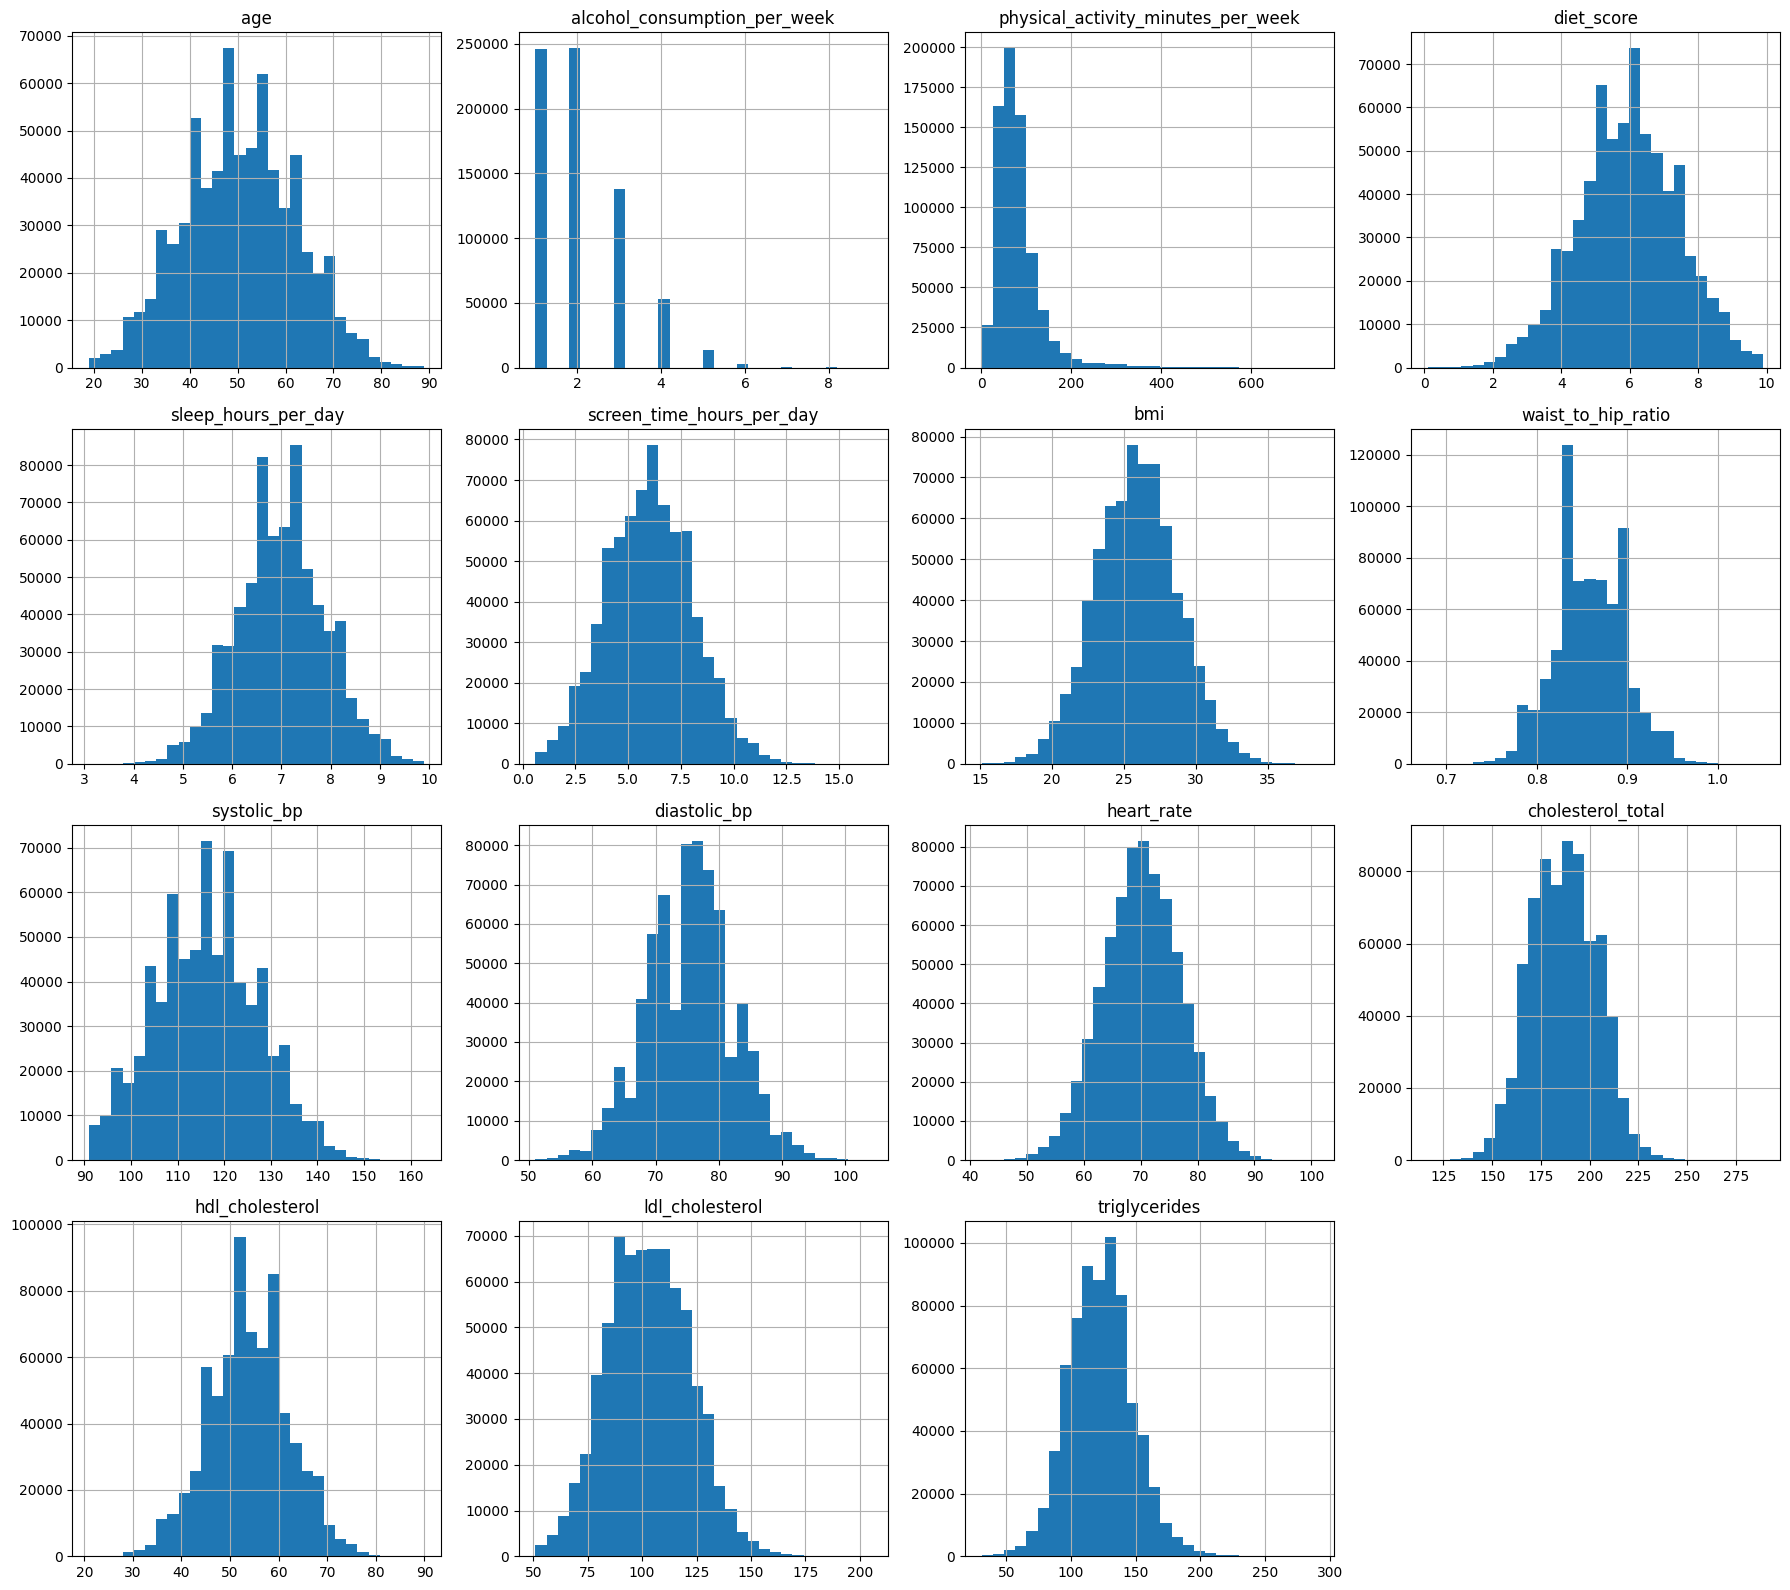

In [6]:
# Plot histograms for numerical features distributions
import matplotlib.pyplot as plt

# Select numerical features
features = [
    "age", "alcohol_consumption_per_week", "physical_activity_minutes_per_week", "diet_score",
    "sleep_hours_per_day", "screen_time_hours_per_day", "bmi", "waist_to_hip_ratio",
    "systolic_bp", "diastolic_bp", "heart_rate", "cholesterol_total",
    "hdl_cholesterol", "ldl_cholesterol", "triglycerides"
]

# Create subplots
plt.figure(figsize=(18, 16))

for i, col in enumerate(features, 1):
    plt.subplot(4, 4, i)
    plt.hist(df_train[col], bins=30)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()


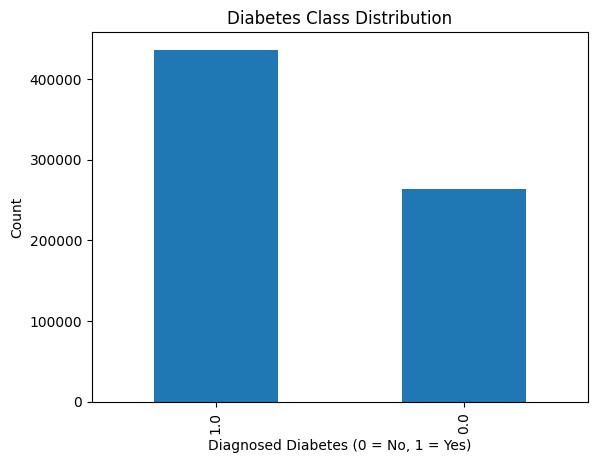

In [7]:
# Plot the distribution of the target variable 'diagnosed_diabetes'
df_train['diagnosed_diabetes'].value_counts().plot(
    kind='bar',
    title='Diabetes Class Distribution'
)
plt.xlabel("Diagnosed Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


More people in the dataset have diabetes than not.

<Figure size 800x500 with 0 Axes>

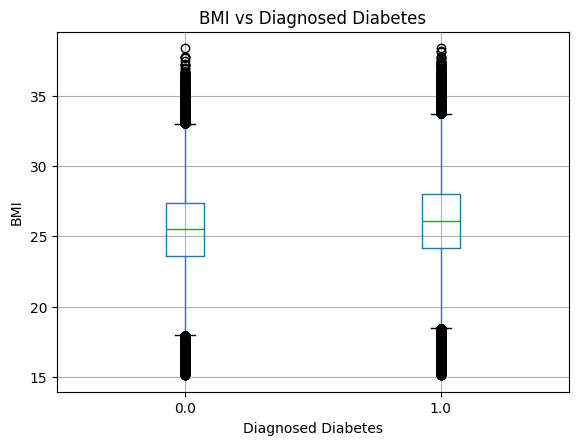

In [8]:

# Boxplot of BMI vs Diagnosed Diabetes
plt.figure(figsize=(8, 5))
df_train.boxplot(column='bmi', by='diagnosed_diabetes')
plt.title("BMI vs Diagnosed Diabetes")
plt.suptitle("")
plt.xlabel("Diagnosed Diabetes")
plt.ylabel("BMI")
plt.show()


The boxplot indicates that individuals diagnosed with diabetes generally report lower weekly physical activity levels compared to non-diabetic individuals. However, substantial overlap between the groups suggests that physical activity is one of several contributing factors rather than a sole determinant.

People with diabetes are typically less active, but exercise levels alone do not explain who develops diabetes.

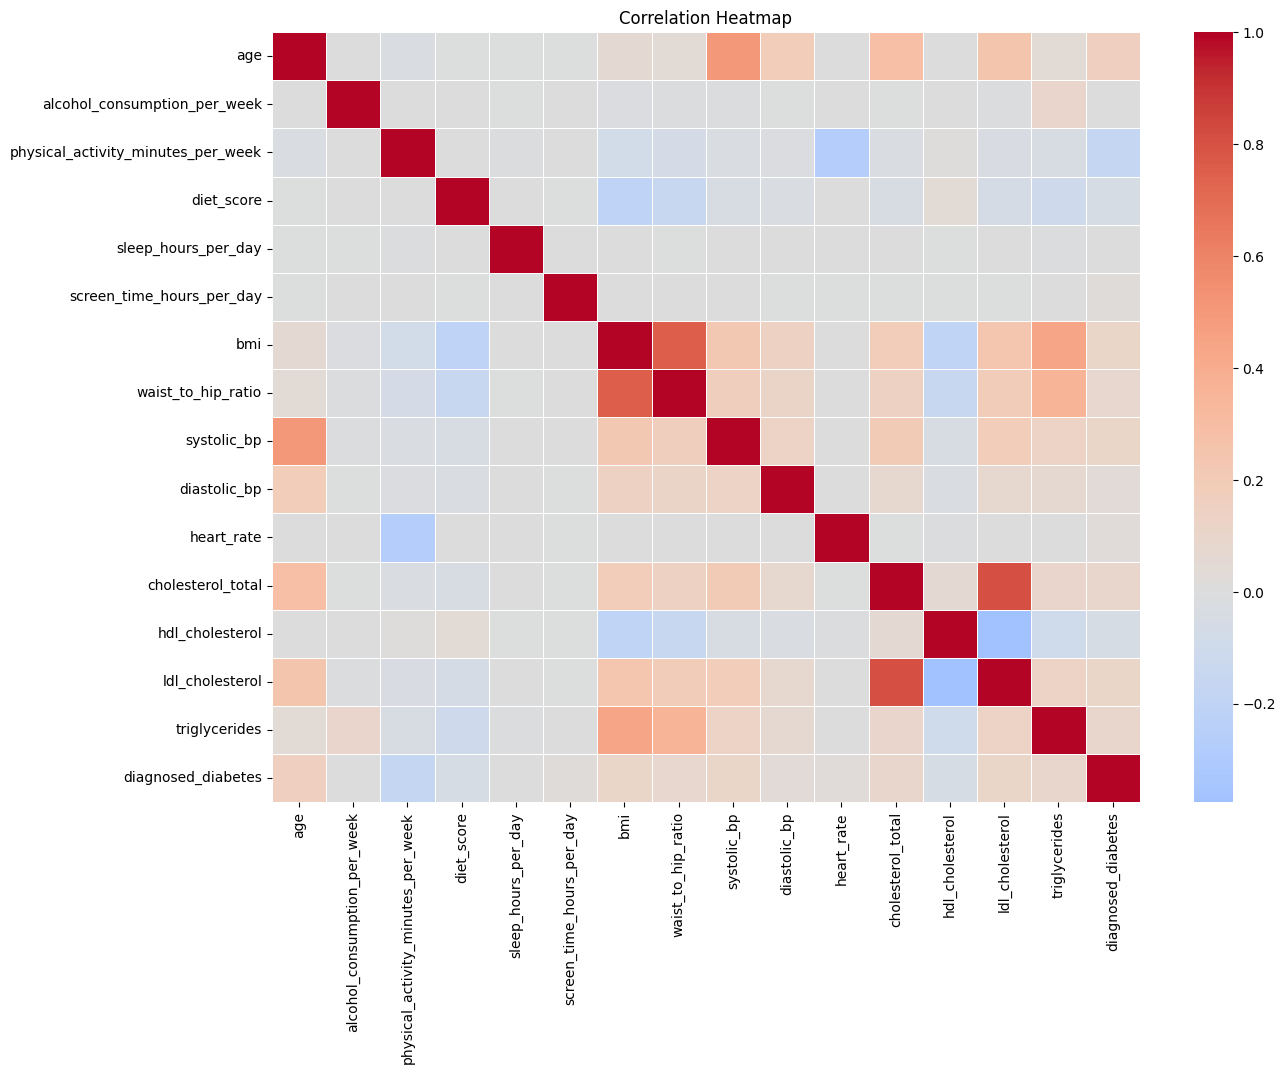

In [9]:
# Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns explicitly
numerical_cols = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi',
    'waist_to_hip_ratio',
    'systolic_bp',
    'diastolic_bp',
    'heart_rate',
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides'
]

# Correlation Heatmap
plt.figure(figsize=(14, 10))

corr = df_train[numerical_cols + ['diagnosed_diabetes']].corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()


The correlation analysis shows that anthropometric measures such as BMI and waist-to-hip ratio are strongly associated with lipid levels and blood pressure. Diagnosed diabetes is moderately correlated with multiple metabolic risk factors, supporting its multifactorial nature. Lifestyle variables show weaker but protective associations.

Weight, fat distribution, and cholesterol are closely related, while diabetes is influenced by many factors acting together rather than a single cause.

<Figure size 800x500 with 0 Axes>

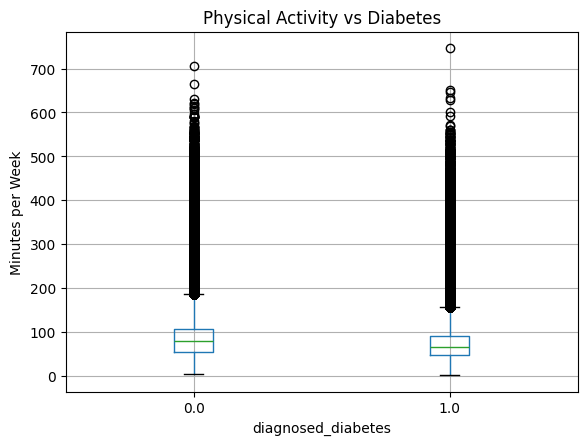

In [10]:
#lifestyle impact on diabetes (physical activity)

plt.figure(figsize=(8, 5))
df_train.boxplot(
    column='physical_activity_minutes_per_week',
    by='diagnosed_diabetes'
)
plt.title("Physical Activity vs Diabetes")
plt.suptitle("")
plt.ylabel("Minutes per Week")
plt.show()


checking feature importance.